In [1]:
import pandas as pd
import numpy as np

In [2]:
j1s1=pd.read_csv('/Users/shuchihan/TYP/adolescent_w1/j1w1_eng/j1w1s_Jan2020.csv')

In [3]:
net=pd.read_csv('/Users/shuchihan/TYP/rawdata/networks_w1.csv')

In [4]:
ethnic=j1s1[['id1','as111f00']].replace(to_replace={1:'Mingnan of Taiwan',2:'Hakka',3:'Chinese Mainlander',4:'Indigenous People',5:'Other',9:'Missing'})

In [5]:
ethnic['as111f00'].value_counts()

as111f00
Mingnan of Taiwan     2020
Chinese Mainlander     336
Hakka                  202
Other                   53
Missing                 41
Indigenous People       38
Name: count, dtype: int64

In [6]:
net

,id1,w1f1,w1f2,w1f3,classnum
0,10529,NaN,10524.0,NaN,903
1,10625,10616.0,NaN,NaN,701
2,10683,10681.0,10686.0,10680.0,712
3,10718,NaN,10726.0,NaN,1305
4,20087,NaN,NaN,20086.0,2008
...,...,...,...,...,...
2839,30623,NaN,NaN,NaN,4002
2840,30624,NaN,NaN,NaN,3301
2841,30625,NaN,NaN,NaN,3503
2842,30626,NaN,NaN,NaN,3504


In [7]:
net_ethnic=pd.merge(net,ethnic,on='id1')

In [8]:
net_ethnic

,id1,w1f1,w1f2,w1f3,classnum,as111f00
0,10529,NaN,10524.0,NaN,903,Chinese Mainlander
1,10625,10616.0,NaN,NaN,701,Mingnan of Taiwan
2,10683,10681.0,10686.0,10680.0,712,Mingnan of Taiwan
3,10718,NaN,10726.0,NaN,1305,Hakka
4,20087,NaN,NaN,20086.0,2008,Chinese Mainlander
...,...,...,...,...,...,...
2685,30590,30593.0,30592.0,30574.0,4002,Mingnan of Taiwan
2686,30591,30569.0,NaN,NaN,4002,Mingnan of Taiwan
2687,30592,30569.0,30591.0,30594.0,4002,Mingnan of Taiwan
2688,30593,NaN,NaN,30574.0,4002,Mingnan of Taiwan


## Write a function to create network graph

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [10]:
def get_network_graph(X,classnum):
    X=X[X['classnum']==classnum]
    
    nodes=list(X['id1'])
    
    edges=list(zip(X['id1'],X['w1f1']))
    edges+=list(zip(X['id1'],X['w1f2']))
    edges+=list(zip(X['id1'],X['w1f3']))
    edges.sort(key=lambda x:x[0])
    edges=[t for t in edges if not isinstance(t[1], float) or not np.isnan(t[1])]
    
    groups=dict(zip(X['id1'],X['as111f00']))
    
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    # Remove self-loops
    self_loops = [(node, node) for node in G.nodes if G.has_edge(node, node)]
    G.remove_edges_from(self_loops)
   

    nx.set_node_attributes(G, groups,'group')

    group_colors = {'Mingnan of Taiwan': 'darkgreen', 'Hakka': 'dodgerblue', 'Chinese Mainlander': 'navy','Indigenous People':'firebrick','Other':'darkorange','Missing':'gainsboro'}

    node_colors = [group_colors[G.nodes[node]['group']] for node in G.nodes()]


    pos = nx.spring_layout(G,k=0.4, iterations=30)  
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=300, edge_color='black')

    legend_handles = [mpatches.Patch(color=color, label=f'{group}') for group, color in group_colors.items()]

    plt.legend(handles=legend_handles, loc='best')

    return plt.show()

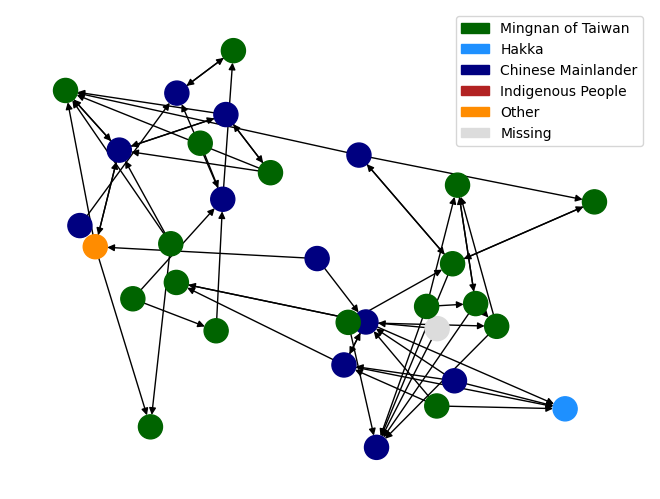

In [21]:
get_network_graph(net_ethnic,817)

## Clustering
Individual clustering for node i:
$$Cl_i(g)=\frac{\Sigma_{j\neq i;k\neq j;k\neq i}g_{ij}g_{ik}g_{jk}}{\Sigma_{j\neq i;k\neq j;k\neq i}g_{ij}g_{ik}}$$
The average clustering coefficient:
$$Cl^{Avg}(g)=\Sigma_i Cl_i(g)/n$$